In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('bmh') or plt.style.use('bmh')
mpl.rcParams["figure.dpi"] = 96
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [2]:
# default settings para plotear Redes
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

Se calculan todas las medidas básicas. ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

In [3]:
G1 = nx.read_edgelist('example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

In [4]:
G2 = nx.read_edgelist('example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

In [5]:
N1 = len(G1)
L1 = G1.size()
degrees1 = list(dict(G1.degree()).values())
kmin1 = min(degrees1)
kmax1 = max(degrees1)

In [6]:
print("Número de nodos: ", N1)
print("Número de enlaces: ", L1)
print('-------')
print("Grado promedio: ", 2*L1/N1) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees1))
print('-------')
print("Grado mínimo: ", kmin1)
print("Grado máximo: ", kmax1)

Número de nodos:  1000
Número de enlaces:  2991
-------
Grado promedio:  5.982
Grado promedio (alternativa de calculo) 5.982
-------
Grado mínimo:  3
Grado máximo:  98


In [7]:
N2 = len(G2)
L2 = G2.size()
degrees2 = list(dict(G2.degree()).values())
kmin2 = min(degrees2)
kmax2 = max(degrees2)

In [8]:
print("Número de nodos: ", N2)
print("Número de enlaces: ", L2)
print('-------')
print("Grado promedio: ", 2*L2/N2) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees2))
print('-------')
print("Grado mínimo: ", kmin2)
print("Grado máximo: ", kmax2)

Número de nodos:  197
Número de enlaces:  1651
-------
Grado promedio:  16.761421319796955
Grado promedio (alternativa de calculo) 16.761421319796955
-------
Grado mínimo:  1
Grado máximo:  43


Analizando el grado medio con los grados mínimos y máximos de ambos set de datos, de su distribución podemos deducir que, la mayor cantidad de nodos se encuentra hacia el lado izquierdo, osea, posee una cola pesada hacia la derecha, donde hay muchos datos cercanos al eje x. Y comparando ambos set de datos, podemos decir que el primero posee una cola más pesada que el segundo.

Se Grafica la distribución del grado en escala log-log y en en escala lineal. ¿Cómo encaja esto con el análisis anterior?

In [9]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges1 = np.logspace(np.log10(kmin1), np.log10(kmax1), num=20)
bin_edges2 = np.logspace(np.log10(kmin2), np.log10(kmax2), num=20)

# histograma de la data para esos bines
density1, _1 = np.histogram(degrees1, bins=bin_edges1, density=True)
density2, _2 = np.histogram(degrees2, bins=bin_edges2, density=True)

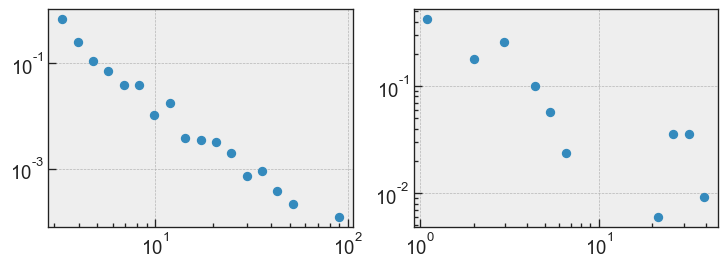

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be1 = np.log10(bin_edges1)
x1 = 10**((log_be1[1:] + log_be1[:-1])/2)

log_be2 = np.log10(bin_edges2)
x2 = 10**((log_be2[1:] + log_be2[:-1])/2)

ax[0].loglog(x1, density1, marker='o', linestyle='none')

ax[1].loglog(x2, density2, marker='o', linestyle='none')

plt.show()

In [11]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges1_1 = np.linspace(kmin1, kmax1, num=20)
bin_edges2_1 = np.linspace(kmin2, kmax2, num=20)

# histograma de la data en estos bines 
density1_1, _1_1 = np.histogram(degrees1, bins=bin_edges1_1, density=True)
density2_1, _2_1 = np.histogram(degrees2, bins=bin_edges2_1, density=True)

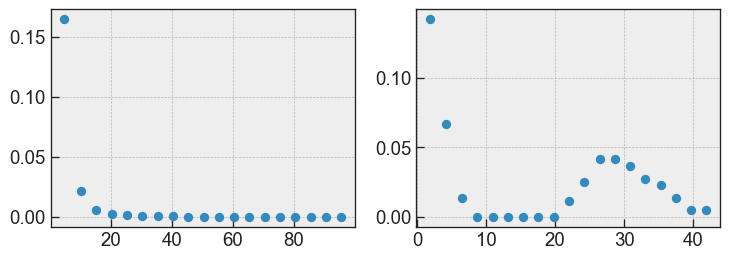

In [14]:
fig2, ax2 = plt.subplots(1, 2, figsize=(9,3))

# "x" debería ser el punto meido (en escala lineal) de cada bin

log_be3 = np.log10(bin_edges1_1)
x3 = 10**((log_be3[1:] + log_be3[:-1])/2)

log_be4 = np.log10(bin_edges2_1)
x4 = 10**((log_be4[1:] + log_be4[:-1])/2)

ax2[0].plot(x3, density1_1, marker='o', linestyle='none')

ax2[1].plot(x4, density2_1, marker='o', linestyle='none')

plt.show()

Al visualizar la distribución de forma lineal, es lo que habíamos inferido a priori, con colas pesadas hacia la derecha. Lo que no habíamos deducido en el gráfico de la derecha, es la concentración de datos entre 20 y 40, lo que nos hace pensar en un posible cluster.

Se Dibuja la red utilizando dos algoritmos de diseño.

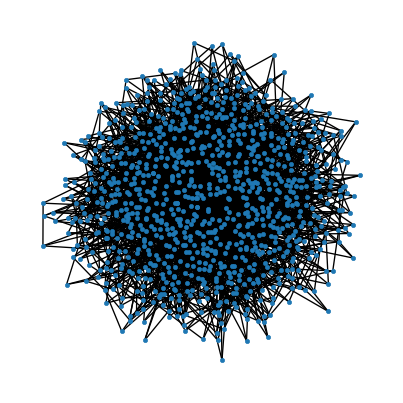

In [21]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(4,4))
nx.draw_spring(G1, node_size=10)

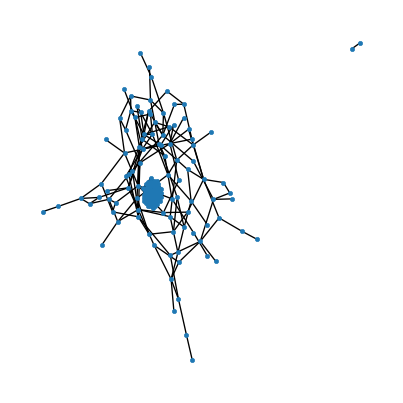

In [22]:
fig = plt.figure(figsize=(4,4))
nx.draw_spring(G2, node_size=10)

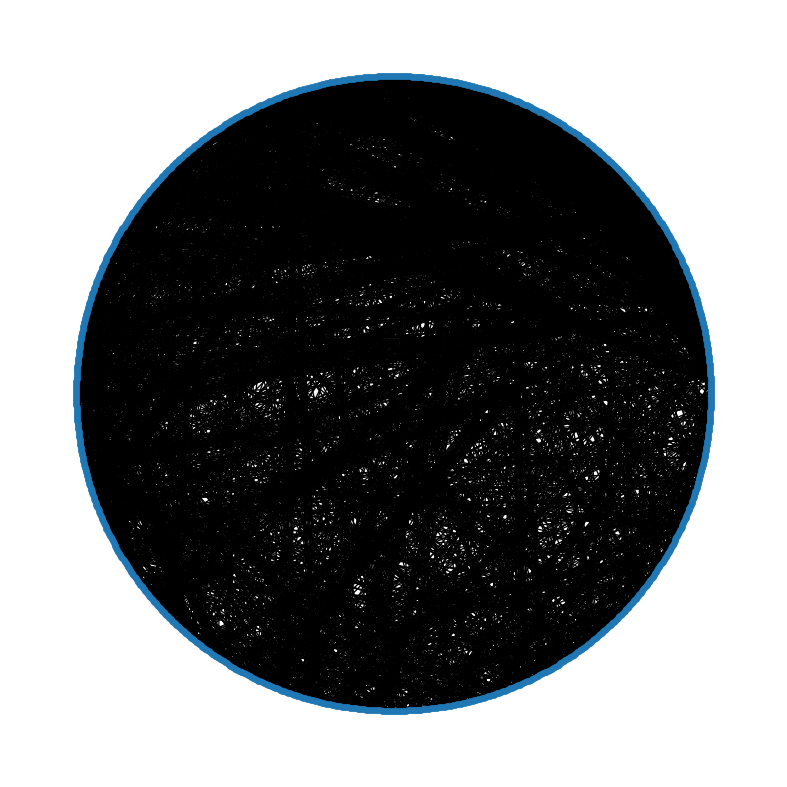

In [36]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G1, node_size=20)

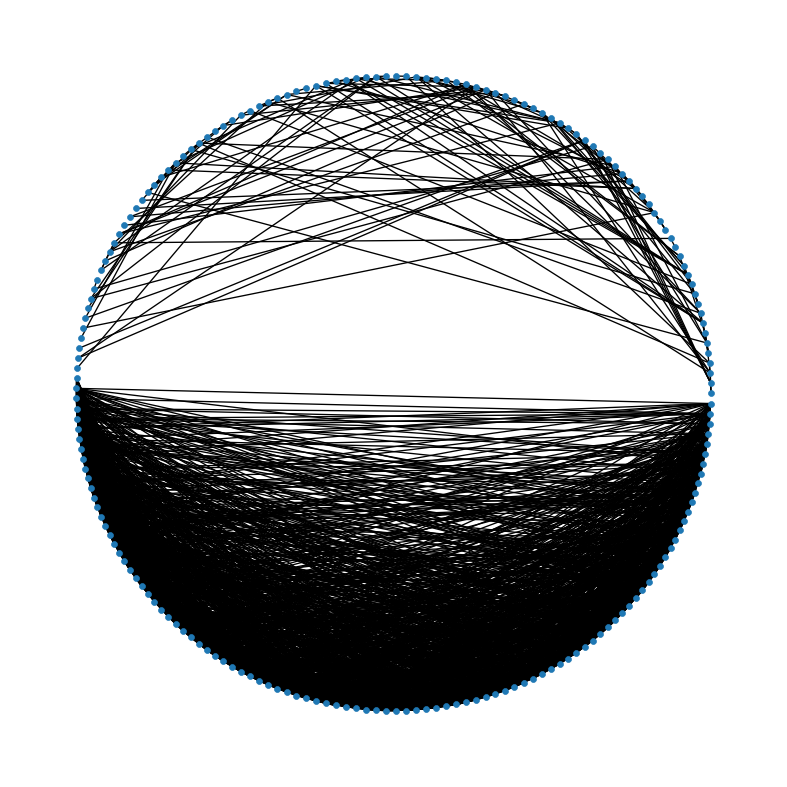

In [37]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G2, node_size=20)